# Práctica: Análisis de regresión lineal

In [ ]:
# Instala dependencias
!wget https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/INEE/BasePracticaRegresion.csv
!pip install pingouin

En las respuestas deben indicar: 
- Hipótesis de trabajo e hipótesis estadísticas, de manera correspondiente.
- Resultados de prueba de normalidad para las distribuciones de las variables de estudio, cuando sea necesario. 
- Indicadores estadísticos utilizados (SW, F, r, R2 B, ß) así como el valor p correspondiente, y la magnitud según criterios de Cohen, de ser pertinente.
- Redacción de las conclusiones.

La facultad de psicología de una universidad privada investiga la posible relación entre la calidad de hábitos de estudio y los rasgos de personalidad de autocontrol y estabilidad emocional en un grupo de 15 estudiantes. 

In [17]:
import pandas as pd

df = pd.read_csv("BasePracticaRegresion.csv")
df

,Hábitos,Autocontrol,Estabilidad
0,73,17,25
1,65,20,25
2,54,22,18
3,33,13,15
4,64,20,15
5,49,16,12
6,51,14,17
7,38,11,13
8,35,21,12
9,44,13,12


## Ejercicio 1

Luego de realizar una exhaustiva revisión teórica, una de las investigadoras tenía la hipótesis de que el autocontrol favorece la calidad de hábitos de estudio de los universitarios.

- Establece la hipótesis de trabajo (HT) e identifica la variable predictora (VI) y la variable de resultado (VD) del modelo.
- Escribe las hipótesis estadísticas para la HT y la ecuación del modelo, indicando el signo de la pendiente (β).
- Presenta un gráfico de dispersión y señala si se observa alguna tendencia que apoye la linealidad entre las variables. 
- Obtén evidencia para esta relación a través de un análisis de correlación entre las dos variables de estudio, identificando primero la normalidad de las distribuciones.
- Plantea la H0 y H1 que corresponden al contraste de hipótesis para la correlación y reporta el resultado, incluyendo la magnitud de la correlación de acuerdo con los criterios de Cohen (1988).

A continuación, lleva a cabo el análisis de regresión lineal simple.

- Indica si es el modelo propuesto es adecuado en estimar el rendimiento académico (ver tabla de ANOVA).
- Indica cuál es el valor del coeficiente de determinación, R2, del modelo e interpreta su valor en términos de variabilidad explicada, señalando la magnitud del ajuste de acuerdo con los criterios de Cohen (1988).
- Lleva a cabo el contraste estadístico correspondiente y redacta la conclusión sobre HT.


## Solución

HT: Los rasgos de autocontrol predicen positivamente los hábitos de estudios de estudiantes universitarios.

- $H_{0}: β_{autocontrol} = 0$
- $H_{1}: β_{autocontrol} > 0$

$Hábitos \ de \ estudio = β_{0} + β_{1}(autocontrol) + \epsilon$

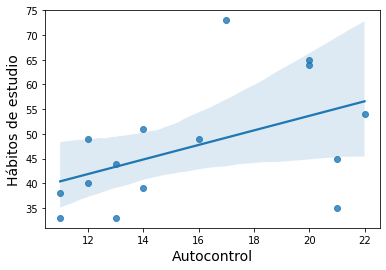

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.regplot(x="Autocontrol", y="Hábitos", data=df)
ax.set_xlabel("Autocontrol", size=14)
ax.set_ylabel("Hábitos de estudio", size=14)
plt.show()

El gráfico de dispersión muestra una tendencia positiva de autocontrol con calidad de hábitos de estudio.

HT1: Los hábitos de estudio y el autocontrol se asocian directamente entre sí.
- $H_{0}$: $r_{xy} = 0$, x = Hábitos de estudio, y = Autocontrol
- $H_{1}$: $r_{xy} > 0$

Primero se llevará a cabo la prueba Shapiro-Wilk para identificar normalidad de las distribuciones de las variables de estudio.
- $H_{0}$: La distribución es normal.
- $H_{1}$: La distribución no es normal.

In [31]:
import pingouin as pg

pg.normality(df[["Hábitos", "Autocontrol"]])

,W,pval,normal
Hábitos,0.923267,0.216004,True
Autocontrol,0.878838,0.045590,False


In [32]:
print("Autocontrol")
print("Asimetría:", df["Autocontrol"].skew())
print("Curtosis:", df["Autocontrol"].kurtosis())

Autocontrol
Asimetría: 0.3586099518844738
Curtosis: -1.5896209697480788


De acuerdo al análisis de normalidad con la prueba Shapiro-Wilk, la distribución de autocontrol, SW =.88, p =.046 fue no normal, mientras que la distribución de hábitos de estudio fue normal, SW =.92, p =.22. Al revisar los indicadores de asimetría y curtosis las distribución no normales no es problemática, por lo que se utilizará el índice paramétrico de correlación de Pearson. 

In [35]:
pg.pairwise_corr(
    columns=["Hábitos", "Autocontrol"],
    method="pearson",
    alternative="greater",
    data=df,
)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,Hábitos,Autocontrol,pearson,greater,15,0.483324,"[0.05, 1.0]",0.033987,2.807,0.597509


El análisis de correlación muestra una correlación directa entre autocontrol y hábitos, r(13)=.48, p=.03 (unilateral) con tamaño del efecto mediano (Cohen, 1988).

In [37]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm

# Fit regression model
model = smf.ols("Hábitos ~ Autocontrol", data=df).fit()
model.summary()

/home/renato/.virtualenvs/stats/lib/python3.7/site-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Hábitos   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     3.962
Date:                Wed, 28 Sep 2022   Prob (F-statistic):             0.0680
Time:                        18:08:55   Log-Likelihood:                -56.357
No. Observations:                  15   AIC:                             116.7
Df Residuals:                      13   BIC:                             118.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      24.1994     12.037      2.010      0.066      -1.805      50.203
Autocontrol     1.4726      0.740      1.991      0.068      -0.126       3.071
==============================================================================
Omnibus:                        1.162   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.559   Jarque-Bera (JB):                0.298
Skew:                           0.339   Prob(JB):                        0.862
Kurtosis:                       3.130   Cond. No.                         68.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El resultado de la prueba de ANOVA fue de F(1, 13)=3.96, p=.068, por lo que el modelo no es adecuado para estimar la variable de hábitos. Además, el R2 ajustado = .175 por lo que se puede decir que el 17.5% de la variación que se observa en la calidad de los hábitos de estudio es explicado por el autocontrol. Según el criterio de Cohen (1988) el coeficiente de determinación es mediano.

El modelo no cuenta con evidencia suficiente para apoyar la hipótesis de trabajo, por lo que esta se descarta. 

## Ejercicio 2

Se plantea comprobar si es que mayores puntajes en autocontrol y estabilidad emocional favorecen la calidad de hábitos de estudio de los universitarios. Asimismo, se postula que entre los dos rasgos, la estabilidad emocional destacaría por su mayor influencia. ¿Se cumple lo que plantea la unidad de psicología?

a) Establece la hipótesis de trabajo (HT).

b) Señala las hipótesis estadísticas (H0 y H1) que correspondan a la HT. 

c) Plantea la ecuación del modelo para la HT.

d) Evalúa los supuestos necesarios para continuar con el análisis de regresión.
- Linealidad
- Normalidad de residuos
- Multicolinealidad

e) Evalúa el ajuste del modelo planteado, interpretando el valor de R2 en términos de la variabilidad explicada de los hábitos de estudio y los criterios de Cohen.

f) Indica si se cumplen las hipótesis y brinda tu conclusión.

## Solución

HT: Los rasgos de autocontrol y de estabilidad emocional predicen positivamente los hábitos de estudios de estudiantes universitarios, siendo la estabilidad el rasgo predictor más fuerte.

- $H_{0}: β_{autocontrol} = 0, β_{estabilidad} = 0$
- $H_{1}: β_{autocontrol} > 0, β_{estabilidad} > 0$

$Hábitos \ de \ estudio = β_{0} + β_{1}(autocontrol) + β_{2}(estabilidad emocional) + \epsilon$, con $β_{estabilidad} > β_{autocontrol}$

- Linealidad

In [18]:
import pingouin as pg

pg.normality(df[["Hábitos", "Autocontrol", "Estabilidad"]])

,W,pval,normal
Hábitos,0.923267,0.216004,True
Autocontrol,0.878838,0.045590,False
Estabilidad,0.831752,0.009680,False


In [19]:
print("Autocontrol")
print("Asimetría:", df["Autocontrol"].skew())
print("Curtosis:", df["Autocontrol"].kurtosis())

print("Estabilidad emocional")
print("Asimetría:", df["Estabilidad"].skew())
print("Curtosis:", df["Estabilidad"].kurtosis())

Autocontrol
Asimetría: 0.3586099518844738
Curtosis: -1.5896209697480788
Estabilidad emocional
Asimetría: 1.0645963685526845
Curtosis: 0.15848867193548655


De acuerdo al análisis de normalidad con la prueba Shapiro-Wilk, las distribuciones de autocontrol, SW =.88, p =.046 y estabilidad emocional, SW =.83, p =.01, fueron no normales, mientras que la distribución de hábitos de estudio fue normal, SW =.92, p =.22. Al revisar los indicadores de asimetría y curtosis las distribuciones no normales no son problemáticas, por lo que se utilizará el índice paramétrico de correlación de Pearson. 

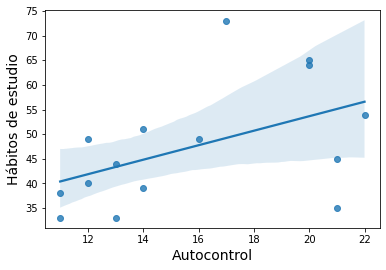

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.regplot(x="Autocontrol", y="Hábitos", data=df)
ax.set_xlabel("Autocontrol", size=14)
ax.set_ylabel("Hábitos de estudio", size=14)
plt.show()

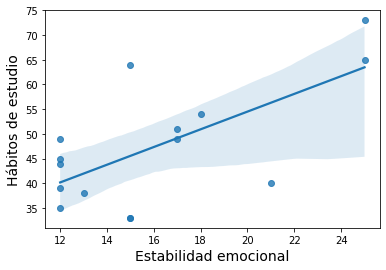

In [29]:
ax = sns.regplot(x="Estabilidad", y="Hábitos", data=df)
ax.set_xlabel("Estabilidad emocional", size=14)
ax.set_ylabel("Hábitos de estudio", size=14)
plt.show()

Los gráficos de dispersión muestran una tendencia positiva tanto de autocontrol con calidad de hábitos de estudio como de estabilidad emocional con calidad de hábitos de estudios. 

In [21]:
pg.pairwise_corr(method="pearson", data=df, alternative="greater")

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,Hábitos,Autocontrol,pearson,greater,15,0.483324,"[0.05, 1.0]",0.033987,2.807,0.597509
1,Hábitos,Estabilidad,pearson,greater,15,0.659726,"[0.31, 1.0]",0.003725,16.633,0.882341
2,Autocontrol,Estabilidad,pearson,greater,15,0.118904,"[-0.34, 1.0]",0.336489,0.452,0.112949


El análisis de correlación muestra correlaciones directas entre autocontrol y hábitos, r(13)=.48, p=.03 (unilateral) y entre estabilidad emocional y hábitos, r(13)=.66, p=.004 (unilateral), con tamaños del efecto mediano y grande respectivamente (Cohen, 1988).

- Normalidad de residuos

In [22]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm

# Fit regression model
model = smf.ols("Hábitos ~ Autocontrol + Estabilidad", data=df).fit()
pg.normality(model.resid)

,W,pval,normal
0,0.96962,0.852387,True


La prueba de normalidad Shapiro-Wilk sugiere que los residuos siguen una distribución normal, SW = .97, p = .85, por lo que se cumple con este supuesto. 

- Multicolinealidad:

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = model.model.exog

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = model.params.index

# calculating VIF for each feature
vif_data["VIF"] = [
    variance_inflation_factor(X, i) for i in range(model.model.exog.shape[1])
]
vif_data

,feature,VIF
0,Intercept,27.944820
1,Autocontrol,1.014341
2,Estabilidad,1.014341


El diagnóstico de multicolinealidad sugiere que ambas variables predictoras, autocontrol y estabilidad emocional, no tienen una relación lineal entre sí (T = .99, VIF = 1.01), por lo que se cumple con el supuesto de independencia de variables.

In [24]:
model.summary()

/home/renato/.virtualenvs/stats/lib/python3.7/site-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Hábitos   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     9.057
Date:                Wed, 28 Sep 2022   Prob (F-statistic):            0.00400
Time:                        17:51:22   Log-Likelihood:                -51.452
No. Observations:                  15   AIC:                             108.9
Df Residuals:                      12   BIC:                             111.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0393     11.403      0.091      0.929     -23.805      25.884
Autocontrol     1.2513      0.559      2.238      0.045       0.033       2.470
Estabilidad     1.6591      0.498      3.329      0.006       0.573       2.745
==============================================================================
Omnibus:                        1.135   Durbin-Watson:                   2.119
Prob(Omnibus):                  0.567   Jarque-Bera (JB):                0.748
Skew:                          -0.047   Prob(JB):                        0.688
Kurtosis:                       1.910   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El resultado de la prueba de ANOVA fue de F(2, 12)=9.06, p=.004, por lo que el modelo es adecuado para estimar la variable de hábitos. Además, el R2 ajustado = .535 por lo que se puede decir que el 53.5% de la variación que se observa en la calidad de los hábitos de estudio es explicado por el autocontrol y la estabilidad emocional. Según el criterio de Cohen (1988) el coeficiente de determinación es grande.

El análisis de regresión lineal múltiple indica que el $B_{0}=1.04$, $B_{autocontrol} =1.25$, $p=.02$ (unilateral) y $B_{estabilidad}=1.66$, $p=.003$ (unilateral) por lo cual se acepta H1, es decir tanto el autocontrol como la estabilidad emocional son variables predictoras positivas y significativas de la calidad de hábitos de estudio. 

En promedio, a cada incremento de una unidad en el autocontrol y estabilidad se observa un incremento de 1.25 y 1.66 respectivamente en hábitos de estudio en universitarios. 

$Hábitos \ de \ estudio = 1.04 + 1.25(autocontrol) + 1.66(estabilidad \ emocional) + 8.35$

In [25]:
import numpy as np
from scipy import stats

model = smf.ols(
    "Hábitos ~ Autocontrol + Estabilidad",
    data=df.select_dtypes(include=[np.number]).dropna().apply(stats.zscore),
).fit()
model.summary()

/home/renato/.virtualenvs/stats/lib/python3.7/site-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Hábitos   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     9.057
Date:                Wed, 28 Sep 2022   Prob (F-statistic):            0.00400
Time:                        17:53:35   Log-Likelihood:                -14.383
No. Observations:                  15   AIC:                             34.77
Df Residuals:                      12   BIC:                             36.89
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.804e-16      0.182   -9.9e-16      1.000      -0.397       0.397
Autocontrol     0.4107      0.184      2.238      0.045       0.011       0.811
Estabilidad     0.6109      0.184      3.329      0.006       0.211       1.011
==============================================================================
Omnibus:                        1.135   Durbin-Watson:                   2.119
Prob(Omnibus):                  0.567   Jarque-Bera (JB):                0.748
Skew:                          -0.047   Prob(JB):                        0.688
Kurtosis:                       1.910   Cond. No.                         1.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Además, la estabilidad emocional es más importante que autocontrol en estimar los hábitos, $β_{estabilidad} = .611 > β_{autocontrol} = .411$.